# TxDOT Project

In [1]:
import os
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import csv
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model

## Load in the Data

In [16]:
df = pd.read_csv('data/Bid_Data.csv')
len(df)

C:\Users\Collin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (27,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


32447

## Formatting & Identifying the Data

In [18]:
df = df[df['Rank'] == 1]
df = df[df['Type'] == 'Construction']

df = df.drop(' From', 1)
df = df.drop('To', 1)
df = df.drop('Contract Description', 1)
df = df.drop('Contractor', 1)
df = df.drop('Contract Category', 1)
df = df.drop('LNG MON', 1)
df = df.drop('MONTH', 1)

df['Award Amount'] = df['Award Amount'].str.lstrip('$')
df['Engineers Estimate'] = df['Engineers Estimate'].str.lstrip('$')
df['Award Amount'] = df['Award Amount'].str.replace(',','').astype(float)
df['Engineers Estimate'] = df['Engineers Estimate'].str.replace(',','').astype(float)

#Renaming Variables
df['EngEst'] = df['Engineers Estimate']
df['NBidders'] = df['Number of Bidders']
df['Date'] = pd.to_datetime(df['Letting Date'])
df.set_index('Date' , inplace=True)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['WinBid'] = df['Award Amount']

# Creating New Varialbes
df['Diff'] = df['EngEst'] - df['WinBid']
df['lnWinBid'] = np.log(df['WinBid'])
df['lnEngEst'] = np.log(df['EngEst'])
df['DiffLn'] = df['lnWinBid'] - df['lnEngEst']
df['Within10Percent'] = 1 
df['PercentOff'] = df['Diff'] / df['EngEst']
df['MoreOrLessThan10'] = 0
df['LessThan10'] = 0
df['MoreThan10'] = 0

df.loc[(df.PercentOff > .10) , 'Within10Percent'] = 0
df.loc[(df.PercentOff < -.10) , 'Within10Percent'] = 0
df.loc[(df.PercentOff > .10) , 'MoreOrLessThan10'] = 1
df.loc[(df.PercentOff < -.10) , 'MoreOrLessThan10'] = 2
df.loc[(df.PercentOff > .10) , 'MoreThan10'] = 1
df.loc[(df.PercentOff < -.10) , 'LessThan10'] = 1

print(len(df))

5177


In [15]:
df

,Type,CCSJ,Letting Call Number,Project,Length,Highway,Letting Date,District,County,Number of Bidders,...,WinBid,Diff,lnWinBid,lnEngEst,DiffLn,Within10Percent,PercentOff,MoreOrLessThan10,LessThan10,MoreThan10
Date,,,,,,,,,,,,,,,,,,,,,
2010-10-21,Construction,0001-05-016,10103012,STP 2009(816)ES,0.200,FM 259,10/21/2010,El Paso,El Paso,1,...,116285.82,7730.08,11.663806,11.728165,-0.064359,1,0.062331,0,0,0
2010-08-11,Construction,0002-01-083,8103285,STP 2011(321),9.050,SH 20,8/11/2010,El Paso,El Paso,6,...,2477913.10,1365614.90,14.722927,15.161901,-0.438974,0,0.355302,1,0,1
2010-04-07,Construction,0002-08-050,4103999,C 2-8-50,1.250,IH 10,4/7/2010,El Paso,Hudspeth,1,...,228662.50,37724.88,12.340002,12.492707,-0.152704,0,0.141617,1,0,1
2010-08-11,Construction,0002-11-056,8103286,IM 0101(256),4.316,IH 10,8/11/2010,El Paso,Culberson,2,...,1094961.15,492577.51,13.906229,14.277695,-0.371466,0,0.310277,1,0,1
2010-05-12,Construction,0002-14-033,5103213,STP 2010(756)ES,0.100,FM 258,5/12/2010,El Paso,El Paso,4,...,149069.50,109807.00,11.912168,12.464106,-0.551938,0,0.424168,1,0,1
2010-02-09,Construction,0003-01-051,2103035,IM 0101(254),1.069,IH 10,2/9/2010,El Paso,Culberson,2,...,409447.31,-66821.41,12.922564,12.744394,0.178169,0,-0.195027,2,1,0
2010-05-12,Construction,0003-05-046,5103208,IM 0201(176),3.806,IH 20,5/12/2010,Odessa,Reeves,4,...,2284464.17,550755.83,14.641642,14.857630,-0.215988,0,0.194255,1,0,1
2010-02-10,Construction,0003-05-048,2103209,IM 0201(175),57.050,IH 20,2/10/2010,Odessa,Reeves,3,...,3460027.14,193621.95,15.056787,15.111237,-0.054450,1,0.052994,0,0,0
2010-08-11,Construction,0004-04-076,8103305,STP 2000(400)TE,1.181,IH 20,8/11/2010,Odessa,Ward,8,...,14473728.60,-1989505.68,16.487846,16.339976,0.147870,0,-0.159362,2,1,0


## Exploring the Data

## We see that Bids are Log Normally Distributed

C:\Users\Collin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


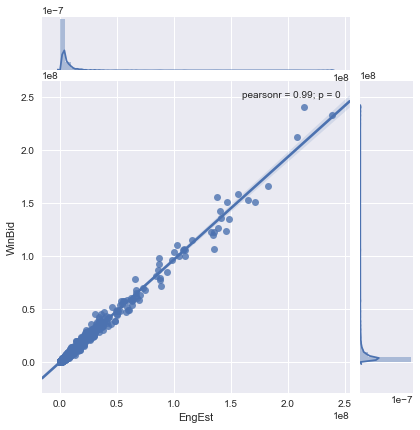

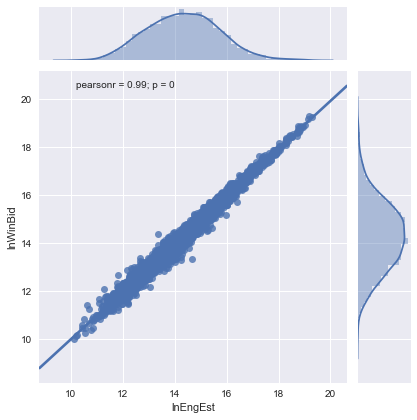

In [26]:
sns.jointplot(x="EngEst", y="WinBid", data=df, kind="reg"); sns.jointplot(x="lnEngEst", y="lnWinBid", data=df, kind="reg");

Axes(0.125,0.125;0.775x0.755)


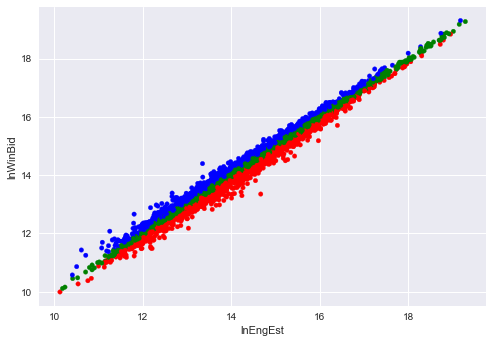

In [20]:
cmap = {'0': 'g', '1': 'r', '2': 'b' }
df['cMoreOrLessThan10'] = df.MoreOrLessThan10.apply(lambda x: cmap[str(x)])
print (df.plot('lnEngEst', 'lnWinBid', kind='scatter', c=df.cMoreOrLessThan10))

In [24]:
df_test = df[(df.Year == 2016) & (df.Month == 4)]
print(len(df_test) , 'projects in April 2016')

df_train = df[(df.Year != 2016) | (df.Month != 4)]
print(len(df_train) ,'projects from Jan 2010 to April 2016')

#df_train[['Year','Month']].tail()

67 projects in April 2016
5110 projects from Jan 2010 to April 2016


In [28]:
#Using ALL the Data

Percent = float(df.Within10Percent.sum()) / len(df)
print(round((Percent)*100,2) , '% of All the TxDOT estimates were within 10% of actual bid')

Percent_April_2016 = float(df[(df.Year == 2016) & (df.Month == 4)].Within10Percent.sum()) / len(df_test)
print (round((Percent_April_2016)*100,2) , '% of the April 2016 TxDOT estimates were within 10% of actual bid')

50.34 % of All the TxDOT estimates were within 10% of actual bid
46.27 % of the April 2016 TxDOT estimates were within 10% of actual bid


In [31]:
names_X = ['Length','NBidders','Year','Month','lnEngEst','Time']

def X_y(df):
    X = df[ names_X ]
    y_more = df['MoreThan10']
    y_less =df['LessThan10']
    return X, y_more, y_less

train_X, train_y_more, train_y_less = X_y(df_train)
test_X, test_y_more, test_y_less = X_y(df_test)

print(len(train_y_more))
print(len(train_y_less))
print(len(test_y_more))
print(len(test_y_less))

5110
5110
67
67


In [32]:
test_X.head()

,Length,NBidders,Year,Month,lnEngEst,Time
Date,,,,,,
2016-04-05,15.055,2,2016,4,14.979827,0.0
2016-04-06,0.016,5,2016,4,14.722602,0.0
2016-04-06,2.024,4,2016,4,16.836501,0.0
2016-04-06,6.294,3,2016,4,14.893941,0.0
2016-04-06,0.455,3,2016,4,13.837735,0.0


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
def RFC_model(X, y):
    """ Performs grid search over the 'n_estimators' parameter for a 
        random forest regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = KFold(n_splits = 30)
    cv_sets.split(X,y)

    # Create a decision tree regressor object
    clf = RandomForestClassifier()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 100
    params = {'n_estimators':range(1,len(X.columns))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    #scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(clf, params, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [46]:
model_1 = RFC_model(train_X,train_y_more)

In [47]:
print('correct training classification = ', model_1.score(train_X, train_y_more))
print ('correct testing classification = ', model_1.score(test_X, test_y_more))

correct training classification =  0.929549902153
correct testing classification =  0.641791044776
